In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('walmart.csv')

In [47]:
###** 1  Data Exploration & Leading **


In [3]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


In [9]:
df.shape

(10051, 11)

In [11]:
df.describe()

,invoice_id,quantity,rating,profit_margin
count,10051.000000,10020.000000,10051.000000,10051.000000
mean,5025.741220,2.353493,5.825659,0.393791
std,2901.174372,1.602658,1.763991,0.090669
min,1.000000,1.000000,3.000000,0.180000
25%,2513.500000,1.000000,4.000000,0.330000
50%,5026.000000,2.000000,6.000000,0.330000
75%,7538.500000,3.000000,7.000000,0.480000
max,10000.000000,10.000000,10.000000,0.570000


In [13]:
df.duplicated().sum()

51

In [15]:
df.isnull().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

In [17]:
#droppping all rows with missing records
df.dropna(inplace=True)

# verify
df.isnull().sum()

invoice_id        0
Branch            0
City              0
category          0
unit_price        0
quantity          0
date              0
time              0
payment_method    0
rating            0
profit_margin     0
dtype: int64

In [19]:
df.shape

(10020, 11)

In [21]:
df.dtypes

invoice_id          int64
Branch             object
City               object
category           object
unit_price         object
quantity          float64
date               object
time               object
payment_method     object
rating            float64
profit_margin     float64
dtype: object

In [32]:
df['unit_price'].astype(float)

0        74.69
1        15.28
2        46.33
3        58.22
4        86.31
         ...  
10046    37.00
10047    58.00
10048    52.00
10049    79.00
10050    62.00
Name: unit_price, Length: 10020, dtype: float64

In [30]:
df['unit_price'] = df['unit_price'].astype(str).str.replace('$', '', regex=False).astype(float)
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10020 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10020 non-null  int64  
 1   Branch          10020 non-null  object 
 2   City            10020 non-null  object 
 3   category        10020 non-null  object 
 4   unit_price      10020 non-null  float64
 5   quantity        10020 non-null  float64
 6   date            10020 non-null  object 
 7   time            10020 non-null  object 
 8   payment_method  10020 non-null  object 
 9   rating          10020 non-null  float64
 10  profit_margin   10020 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 939.4+ KB


In [36]:
df['total'] = df['unit_price'] * df['quantity']
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17


In [38]:
df.columns

Index(['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin', 'total'],
      dtype='object')

In [40]:
df.columns = df.columns.str.lower()
df.columns

Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin', 'total'],
      dtype='object')

In [ ]:
## Data Visalization

In [42]:
# Classify columns based on data types
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include='number').columns


🔹 Univariate 

Summary of 'invoice_id':
count    10020.000000
mean      5035.386926
std       2900.463112
min          1.000000
25%       2536.750000
50%       5041.500000
75%       7546.250000
max      10000.000000
Name: invoice_id, dtype: float64


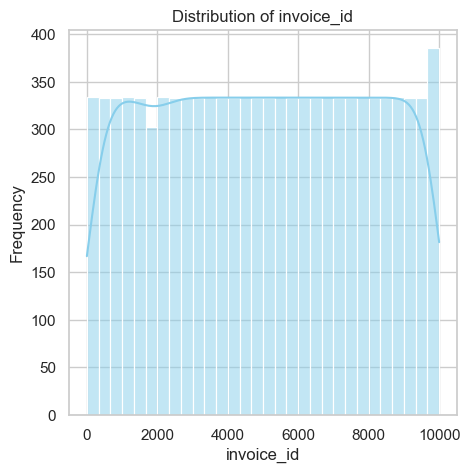


Summary of 'unit_price':
count    10020.000000
mean        50.630053
std         21.197783
min         10.080000
25%         32.000000
50%         51.000000
75%         69.000000
max         99.960000
Name: unit_price, dtype: float64


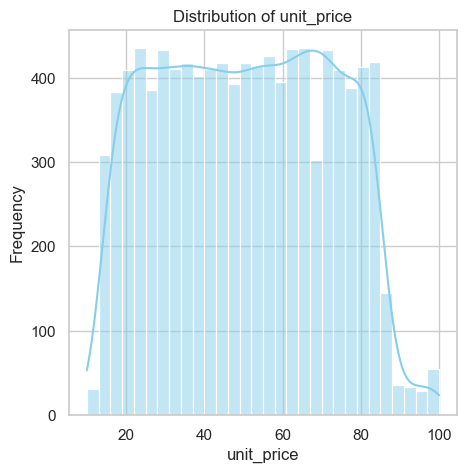


Summary of 'quantity':
count    10020.000000
mean         2.353493
std          1.602658
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: quantity, dtype: float64


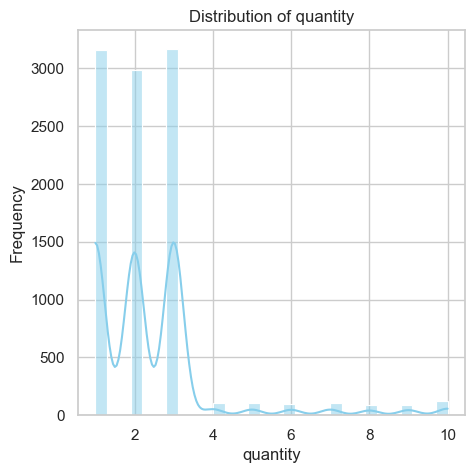


Summary of 'rating':
count    10020.000000
mean         5.824321
std          1.763615
min          3.000000
25%          4.000000
50%          6.000000
75%          7.000000
max         10.000000
Name: rating, dtype: float64


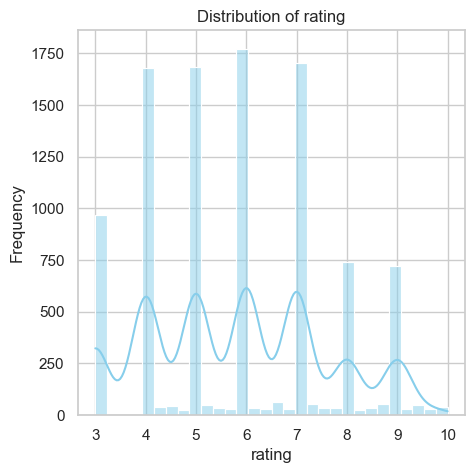


Summary of 'profit_margin':
count    10020.000000
mean         0.393722
std          0.090672
min          0.180000
25%          0.330000
50%          0.330000
75%          0.480000
max          0.570000
Name: profit_margin, dtype: float64


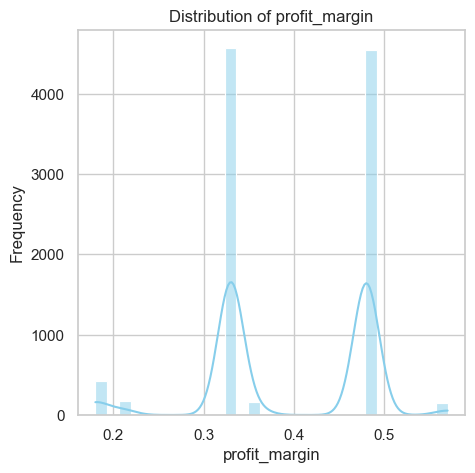


Summary of 'total':
count    10020.000000
mean       121.240058
std        112.467617
min         10.170000
25%         54.000000
50%         88.000000
75%        156.000000
max        993.000000
Name: total, dtype: float64


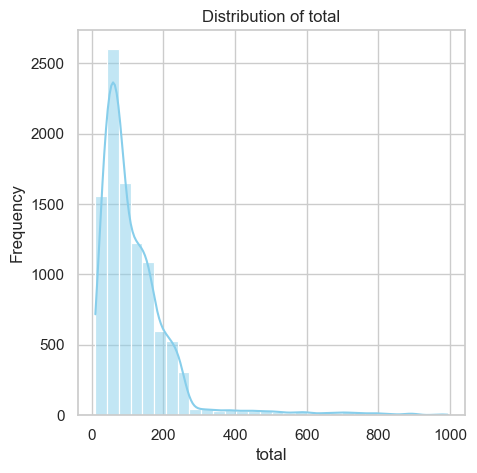

In [106]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (5, 5)
print("🔹 Univariate ")
for col in numerical_cols:
    print(f"\nSummary of '{col}':")
    print(df[col].describe())

    plt.figure()
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


🔹 Univariate Analysis: Categorical Columns

Value counts for 'branch':
branch
WALM058    240
WALM009    236
WALM030    232
WALM069    223
WALM074    212
          ... 
WALM013     57
WALM034     56
WALM031     56
WALM014     52
WALM092     51
Name: count, Length: 100, dtype: int64


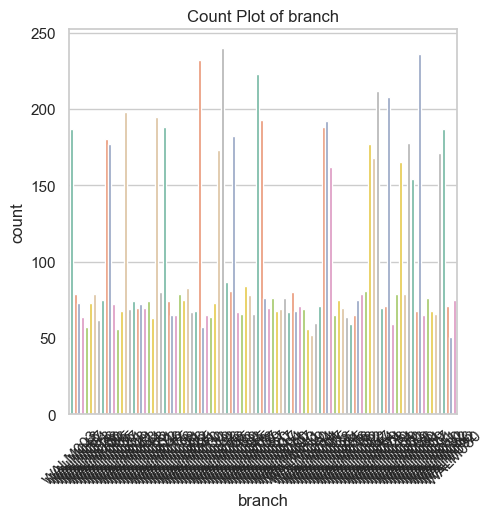


Value counts for 'city':
city
Weslaco            399
Waxahachie         381
Port Arthur        240
Plano              236
Richardson         232
                  ... 
Pearland            57
College Station     56
Lewisville          56
Amarillo            52
Lake Jackson        51
Name: count, Length: 98, dtype: int64


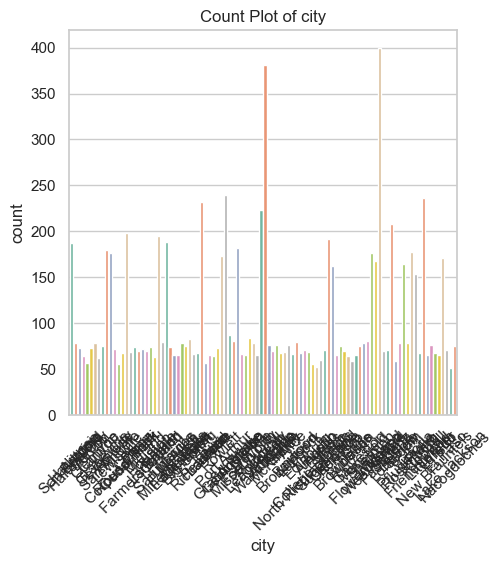


Value counts for 'category':
category
Fashion accessories       4564
Home and lifestyle        4545
Electronic accessories     419
Food and beverages         174
Sports and travel          166
Health and beauty          152
Name: count, dtype: int64


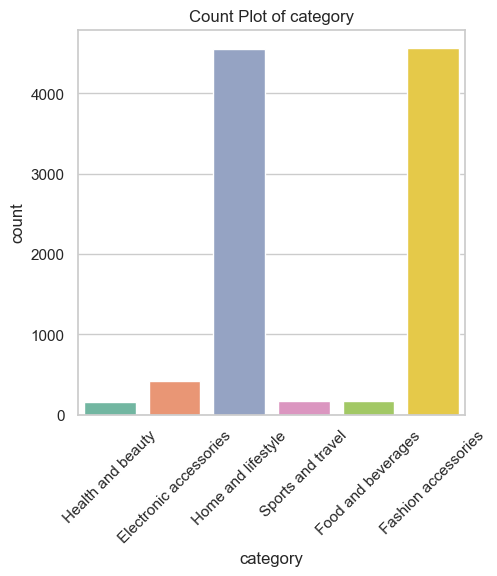


Value counts for 'date':
date
01/12/21    48
01/12/23    45
01/12/20    38
01/12/22    36
25/11/21    33
            ..
08/04/21     1
21/05/21     1
24/08/20     1
08/04/22     1
05/06/22     1
Name: count, Length: 1460, dtype: int64


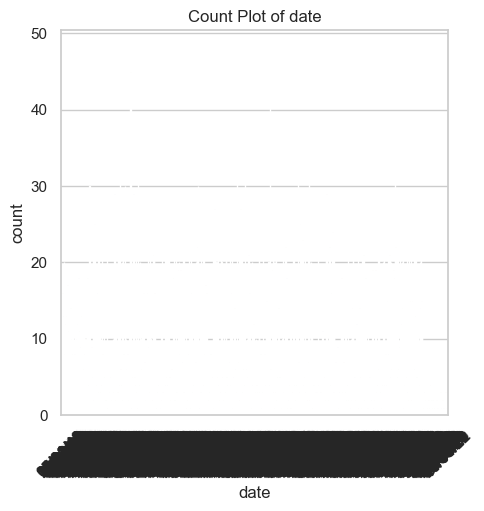


Value counts for 'time':
time
15:48:00    33
15:05:00    31
15:40:00    31
15:42:00    30
16:09:00    30
            ..
22:11:00     1
22:57:00     1
21:12:00     1
21:32:00     1
12:59:00     1
Name: count, Length: 1001, dtype: int64


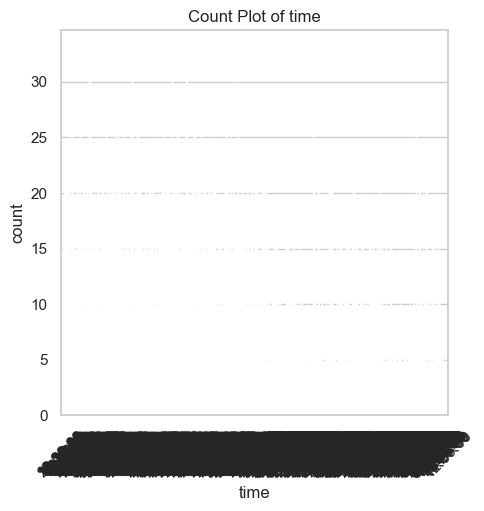


Value counts for 'payment_method':
payment_method
Credit card    4259
Ewallet        3881
Cash           1880
Name: count, dtype: int64


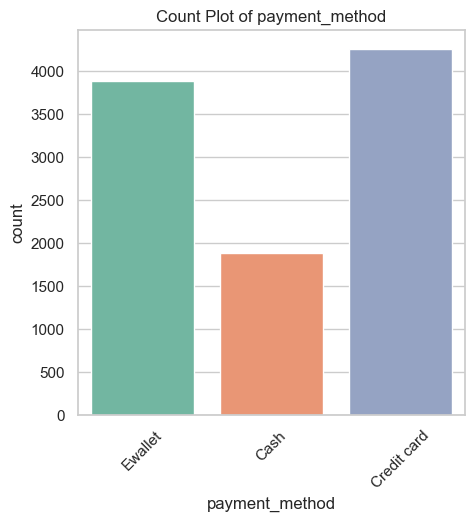

In [108]:
print("\n🔹 Univariate Analysis: Categorical Columns")
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())

    plt.figure()
    sns.countplot(data=df, x=col, hue=col, palette='Set2', legend=False)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

🔹 Bivariate Analysis: Correlation Heatmap


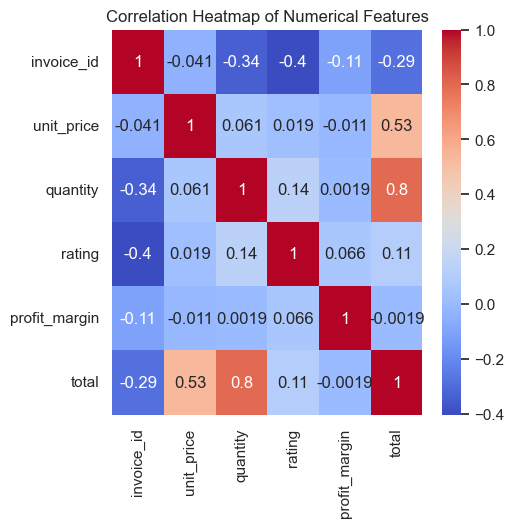

In [111]:
# Correlation Heatmap
print("🔹 Bivariate Analysis: Correlation Heatmap")
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


🔹 Scatter Plots Between Numerical Columns


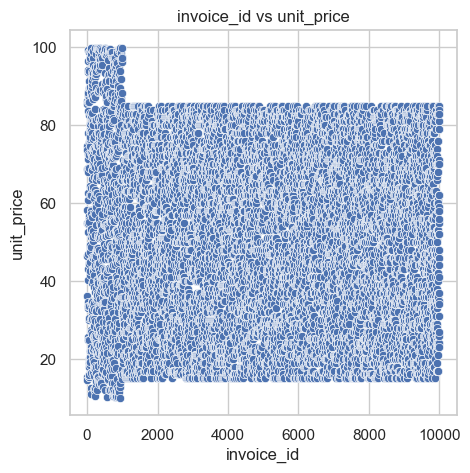

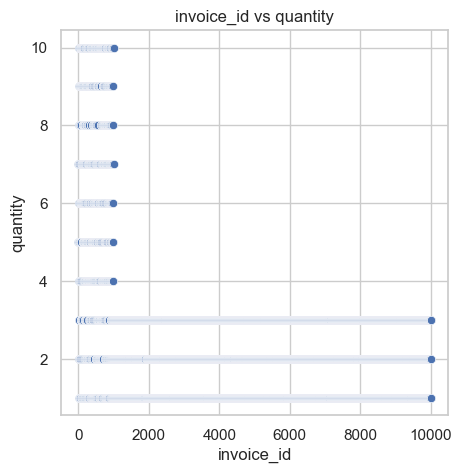

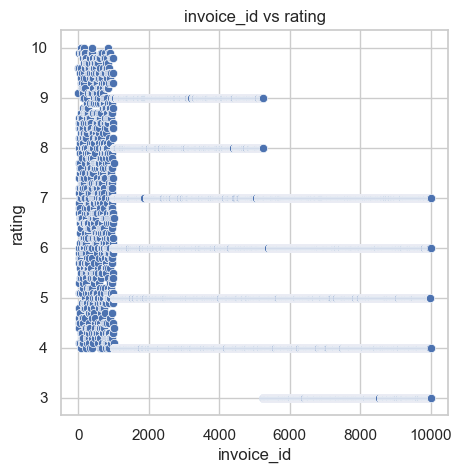

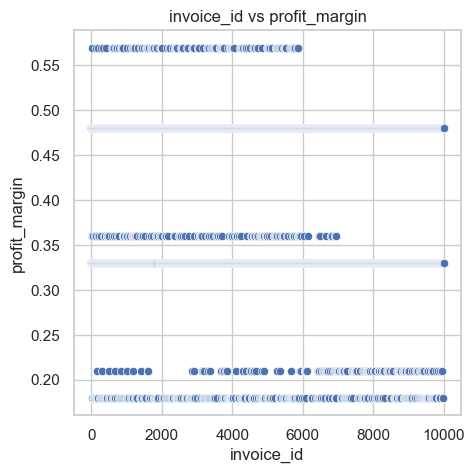

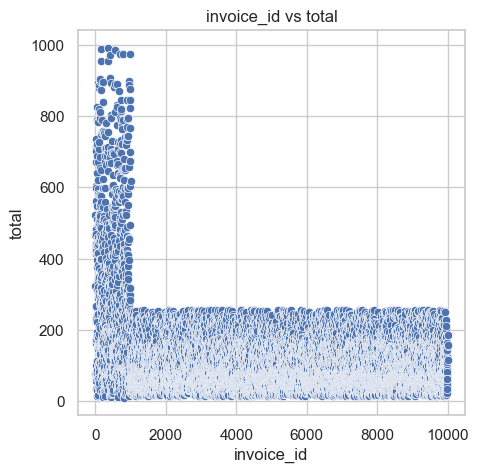

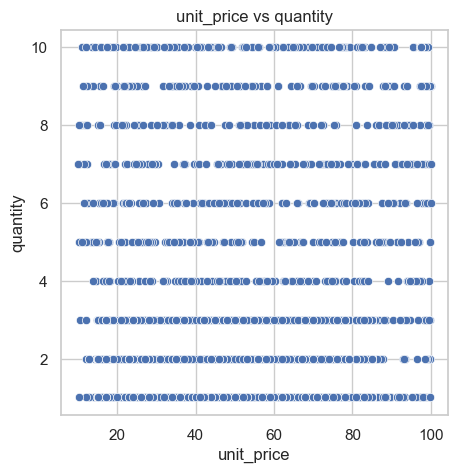

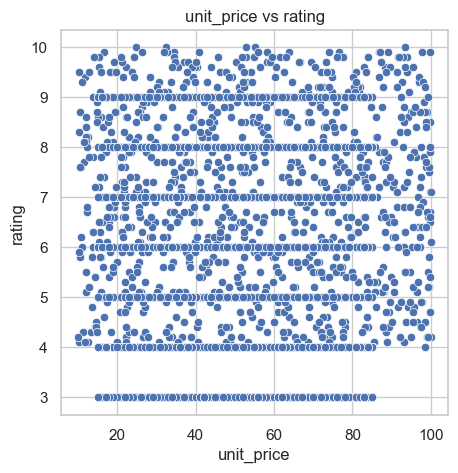

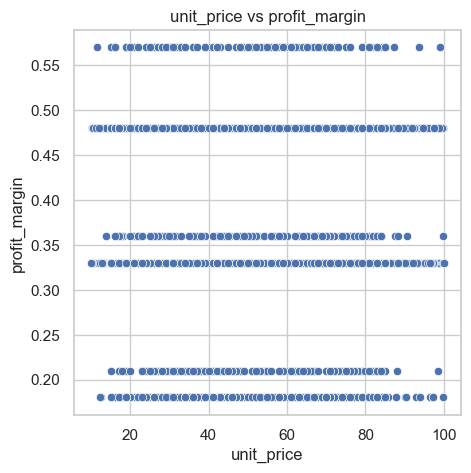

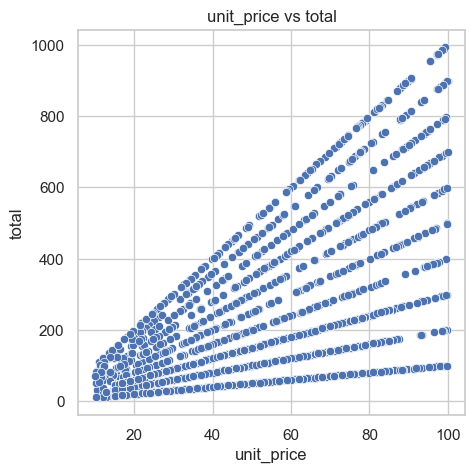

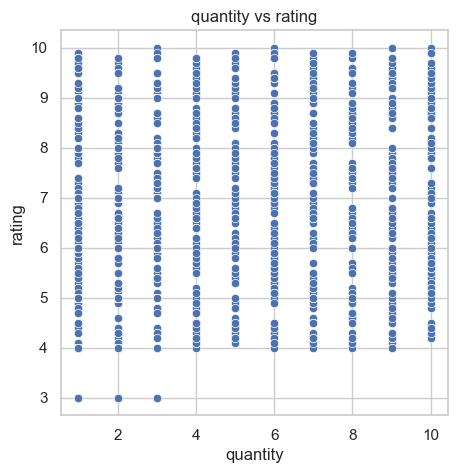

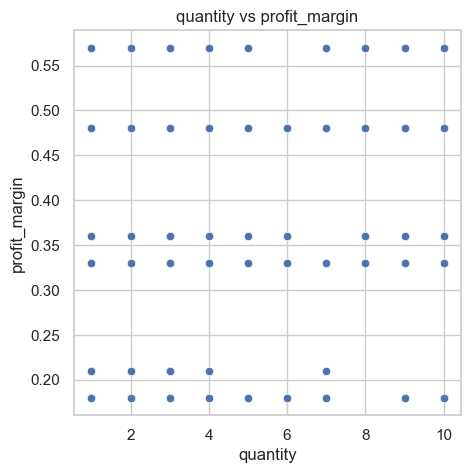

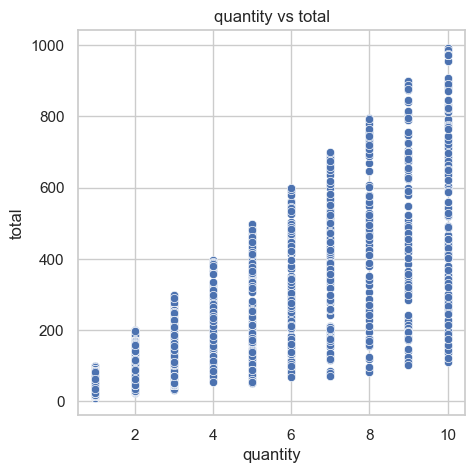

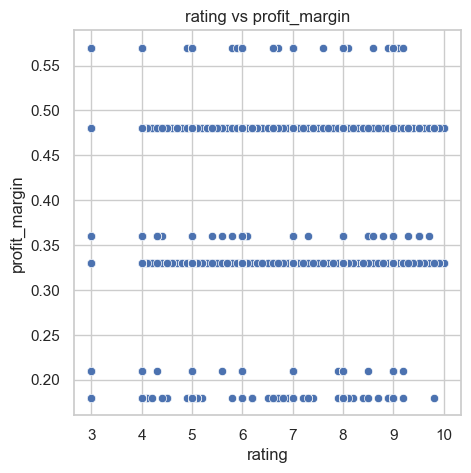

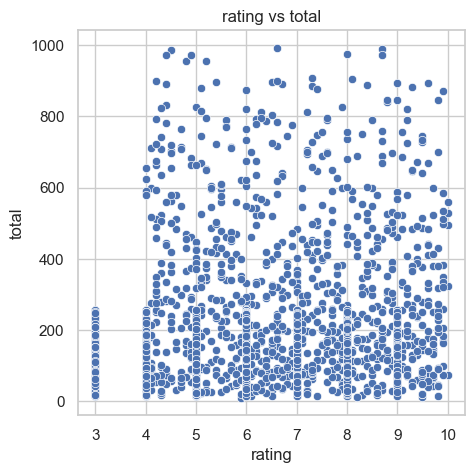

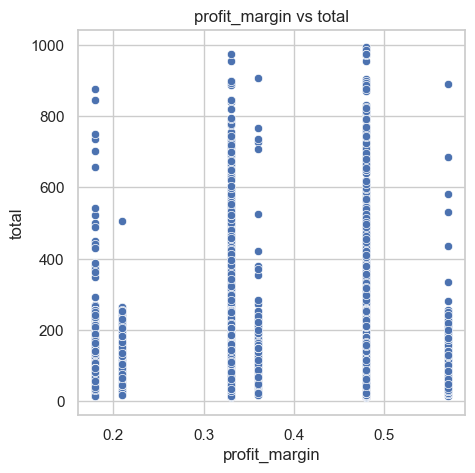

In [112]:
# Scatter Plots
print("🔹 Scatter Plots Between Numerical Columns")
for i in range(len(numerical_cols)):
    for j in range(i + 1, len(numerical_cols)):
        plt.figure()
        sns.scatterplot(data=df, x=numerical_cols[i], y=numerical_cols[j])
        plt.title(f"{numerical_cols[i]} vs {numerical_cols[j]}")
        plt.show()

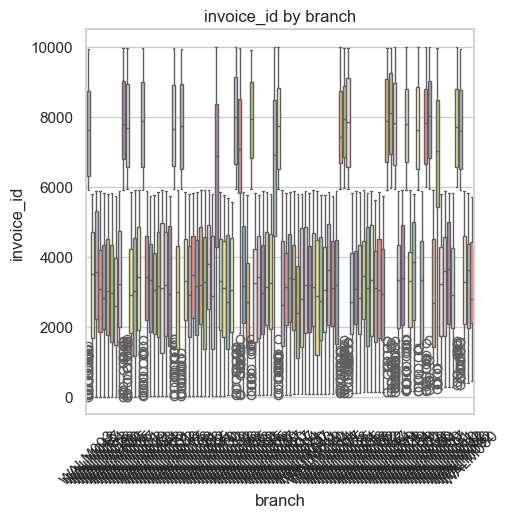

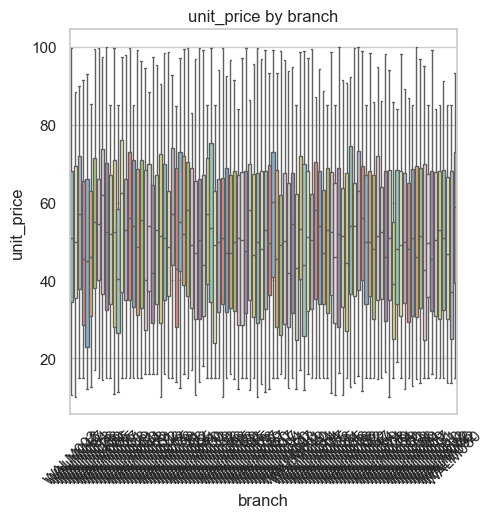

In [ ]:
# Boxplots: Categorical vs Numerical
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure()
        sns.boxplot(x=cat_col, y=num_col, hue=cat_col, data=df, palette='Set3', legend=False)
        plt.title(f"{num_col} by {cat_col}")
        plt.xticks(rotation=45)
        plt.show()

In [ ]:
if 'Store' in df.columns and 'Weekly_Sales' in df.columns:
    top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
    plt.figure()
    sns.barplot(x=top_stores.index.astype(str), y=top_stores.values, palette='viridis')
    plt.title("Top 10 Stores by Total Weekly Sales")
    plt.xlabel("Store")
    plt.ylabel("Total Sales")
    plt.show()


In [48]:
if 'Store' in df.columns and 'Dept' in df.columns and 'Weekly_Sales' in df.columns:
    pivot_table = df.pivot_table(values='Weekly_Sales', index='Store', columns='Dept', aggfunc='sum', fill_value=0)
    plt.figure(figsize=(14, 8))
    sns.heatmap(pivot_table, cmap='YlGnBu')
    plt.title("Sales Heatmap: Store vs Department")
    plt.xlabel("Department")
    plt.ylabel("Store")
    plt.show()


In [58]:
!pip install mysql-connector-python sqlalchemy pymysql

In [55]:
import pandas as pd
from sqlalchemy import create_engine

In [84]:
from sqlalchemy import create_engine

username = "root"          # use plain string (no @ here)
password = "Uday@8975"          # password without @
host = "localhost"
port = 3306
database = "walmart sales"       # your MySQL database name

# Build the connection string properly
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")



In [88]:
# STEP 1: Load data once (you already did this earlier)
query = "SELECT * FROM your_table_name;"
df = pd.read_sql(query, engine)

# STEP 2: Perform EDA (already done)
df.info()
df.describe()
df.isnull().sum()
# etc...

# STEP 3: Later in the notebook — reuse same `df` directly
df.head()
df['column_name'].value_counts()
df[df['column_name'] > 100]


OperationalError: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on '8975@localhost' ([Errno 11003] getaddrinfo failed)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)